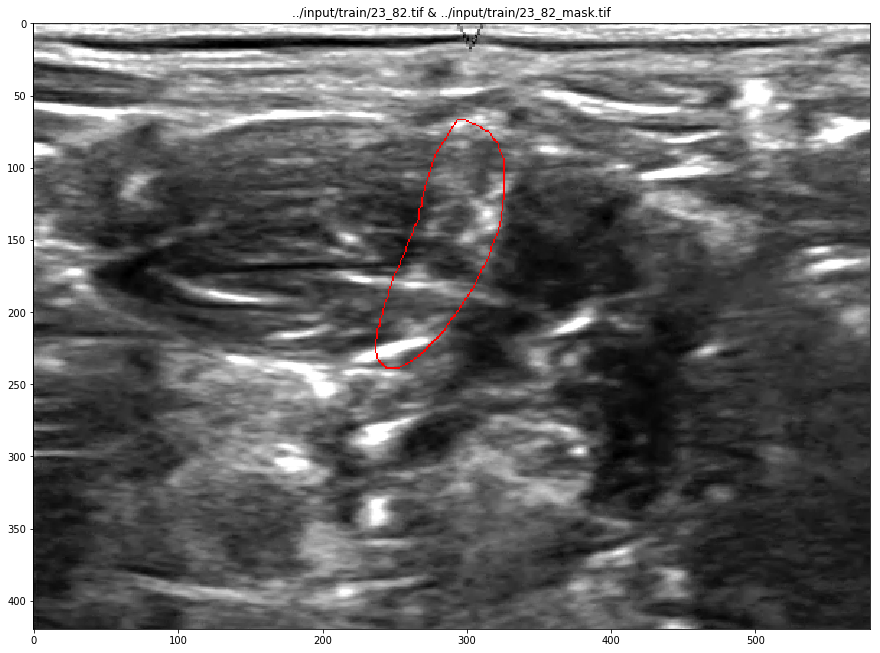

plotted: ../input/train/23_82.tif & ../input/train/23_82_mask.tif


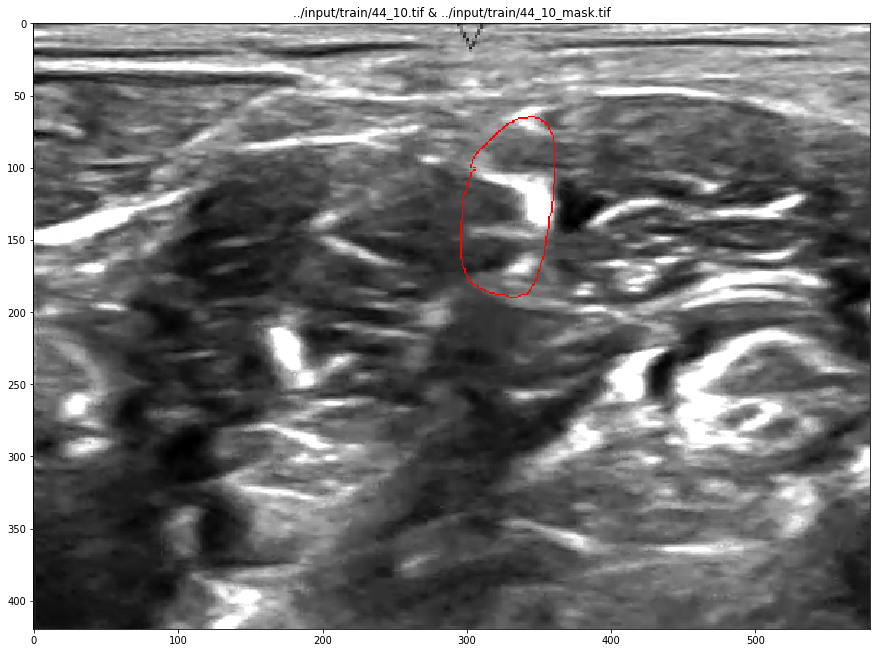

plotted: ../input/train/44_10.tif & ../input/train/44_10_mask.tif


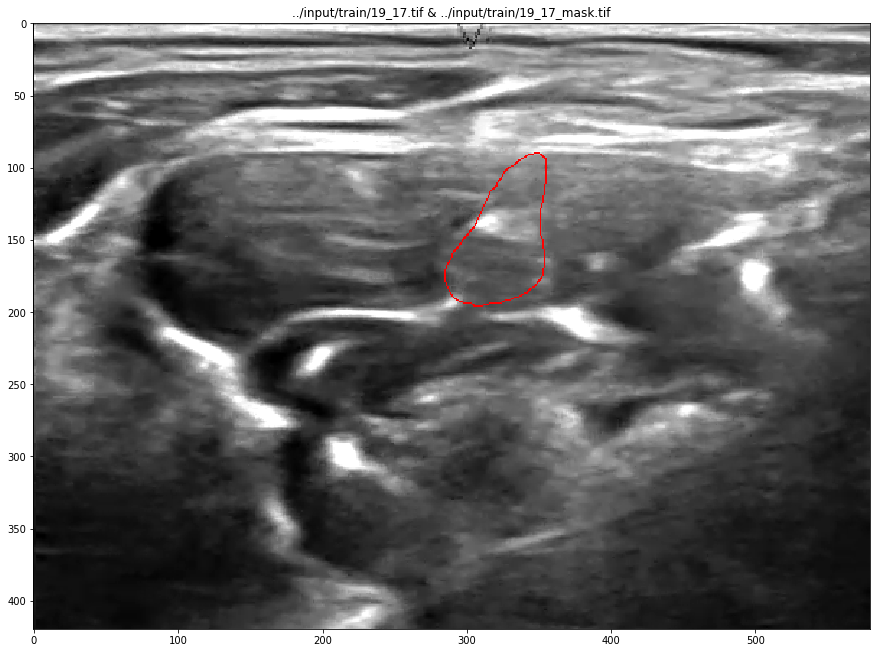

plotted: ../input/train/19_17.tif & ../input/train/19_17_mask.tif


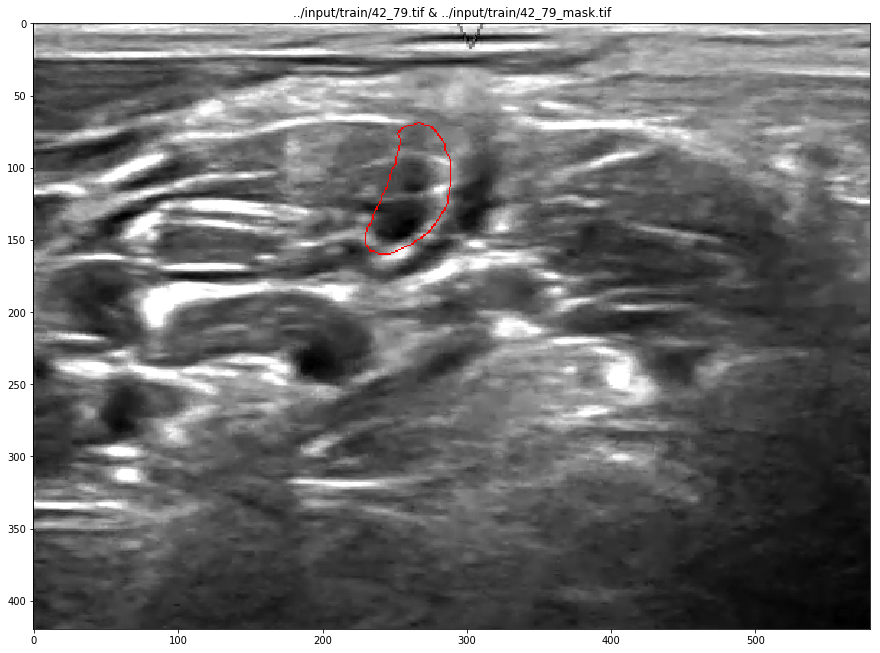

plotted: ../input/train/42_79.tif & ../input/train/42_79_mask.tif


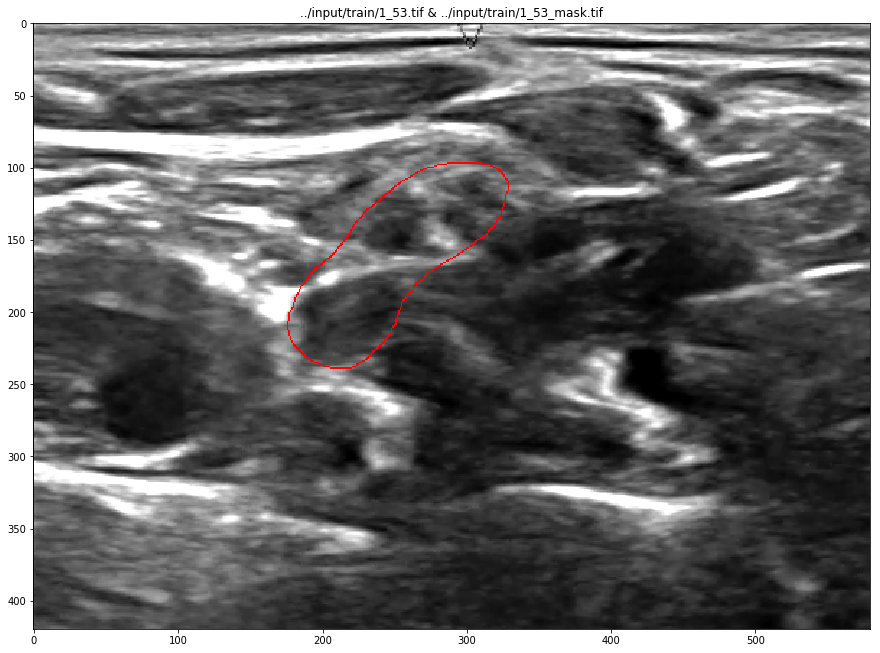

plotted: ../input/train/1_53.tif & ../input/train/1_53_mask.tif


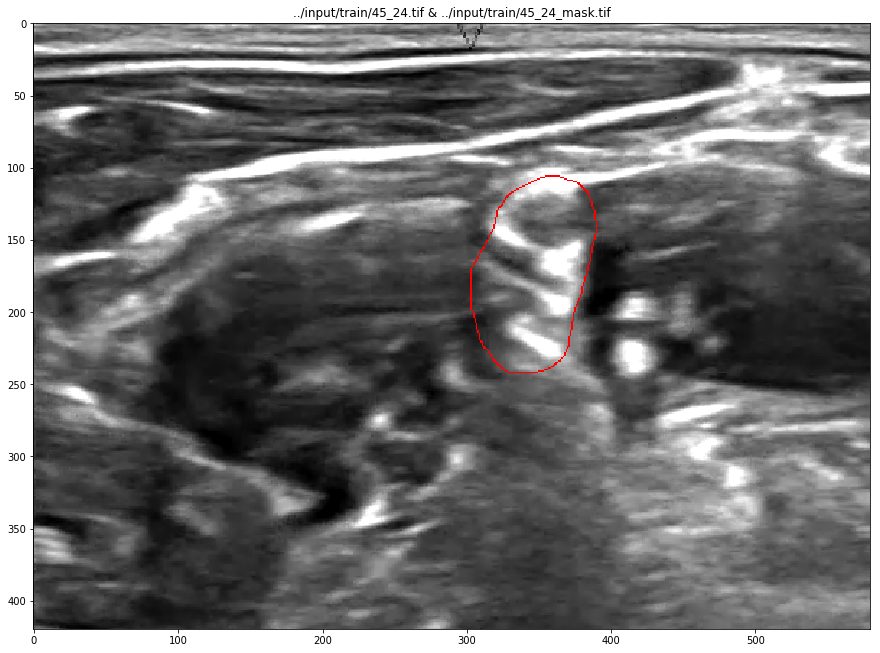

plotted: ../input/train/45_24.tif & ../input/train/45_24_mask.tif


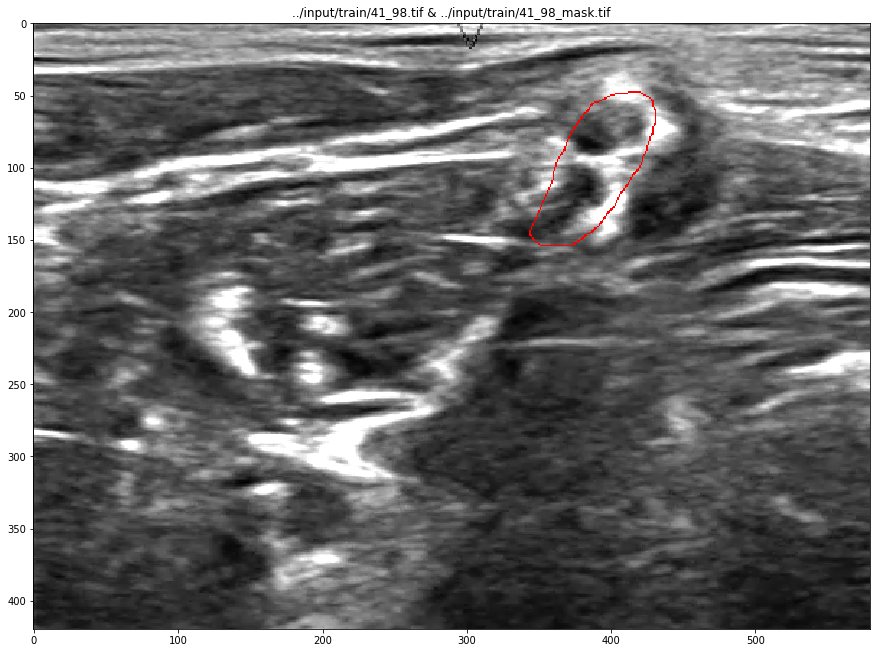

plotted: ../input/train/41_98.tif & ../input/train/41_98_mask.tif


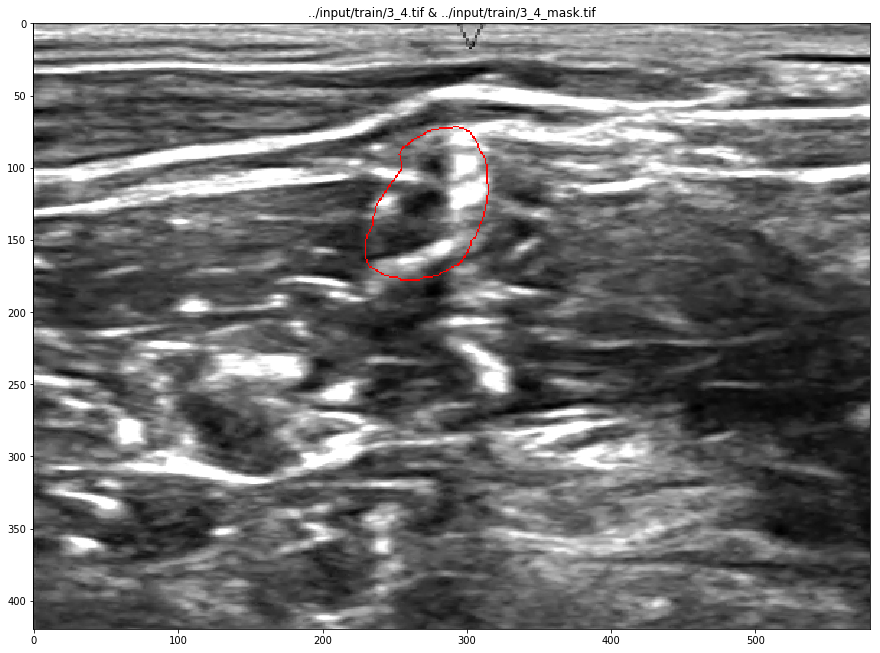

plotted: ../input/train/3_4.tif & ../input/train/3_4_mask.tif


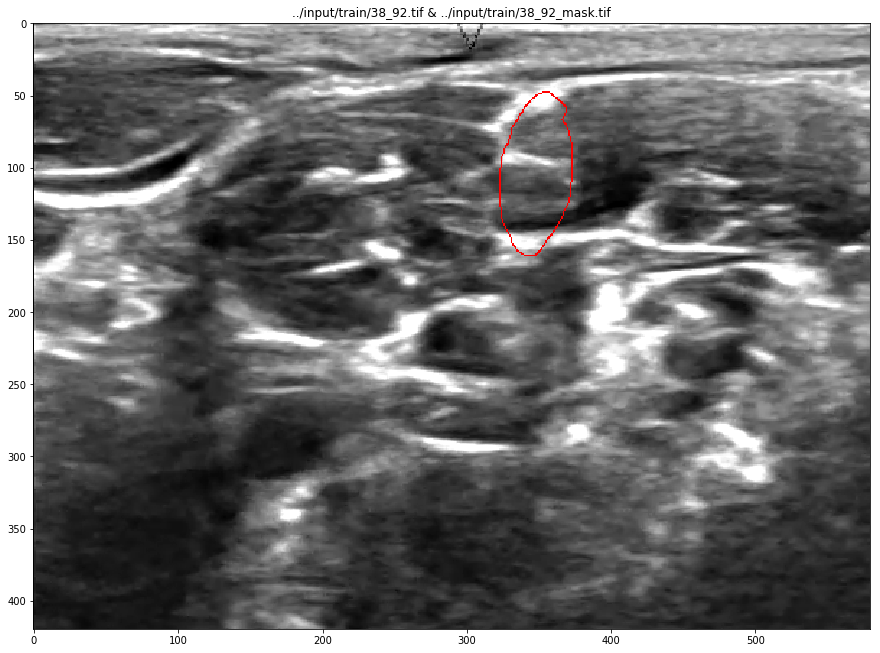

plotted: ../input/train/38_92.tif & ../input/train/38_92_mask.tif


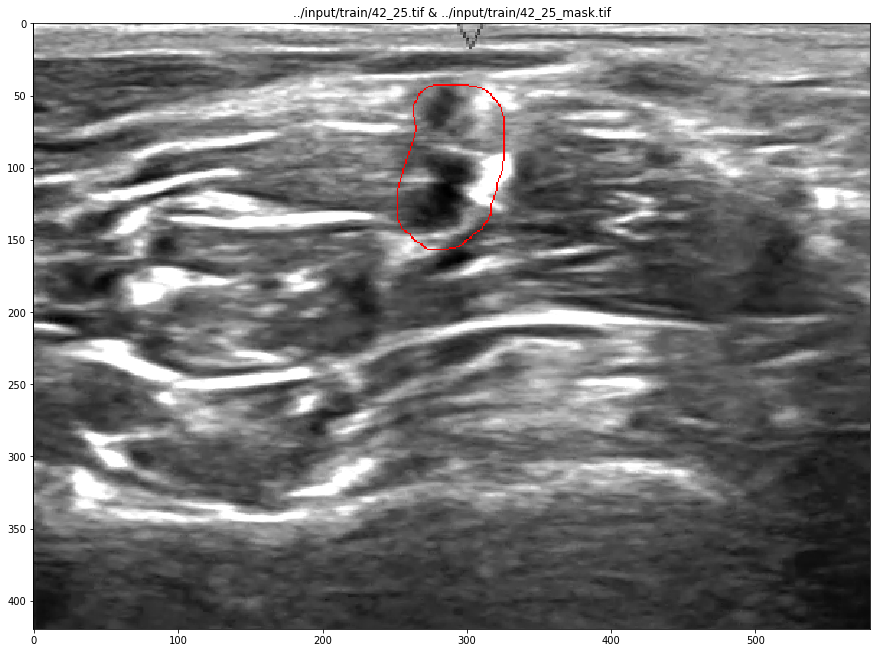

plotted: ../input/train/42_25.tif & ../input/train/42_25_mask.tif


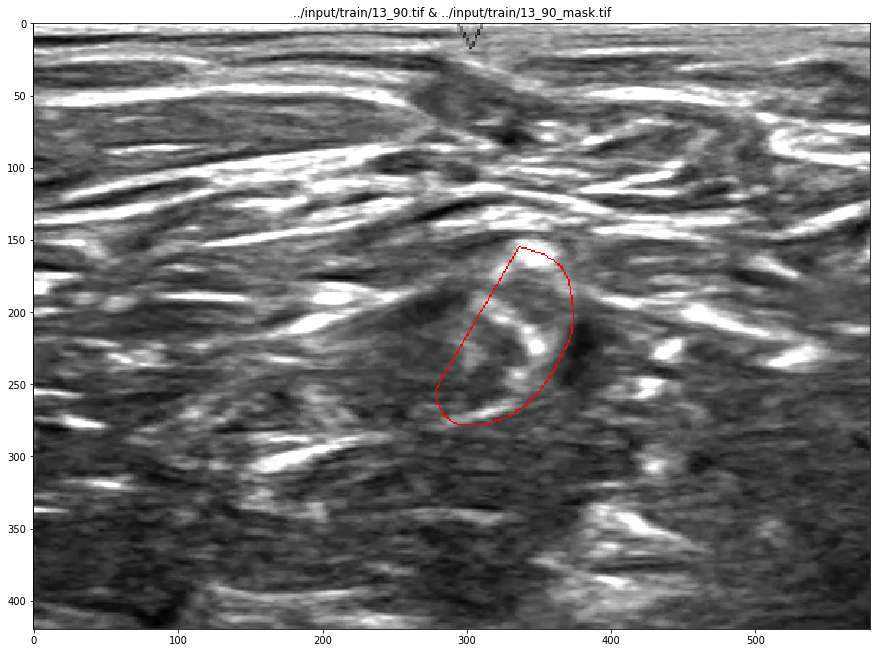

plotted: ../input/train/13_90.tif & ../input/train/13_90_mask.tif


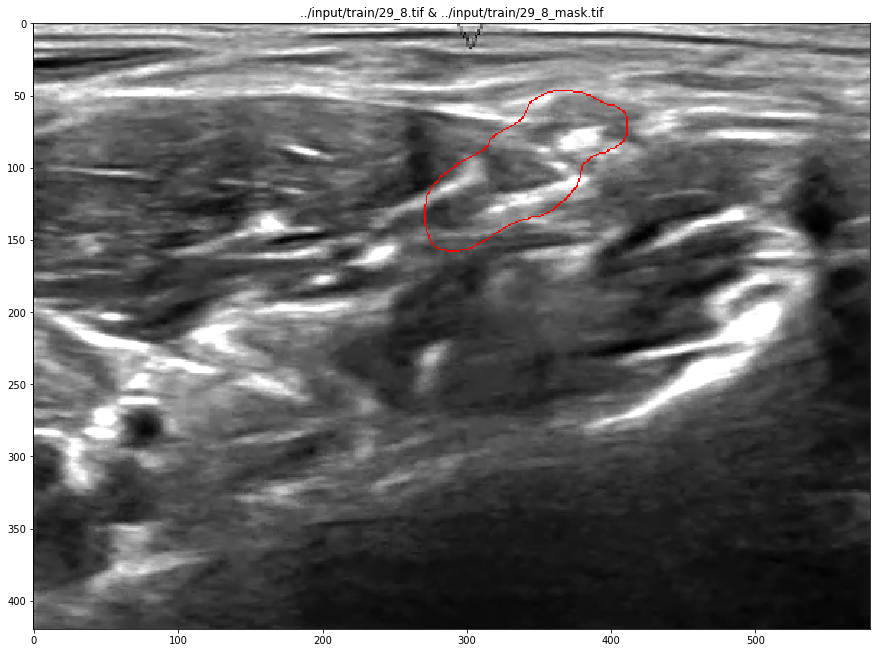

plotted: ../input/train/29_8.tif & ../input/train/29_8_mask.tif


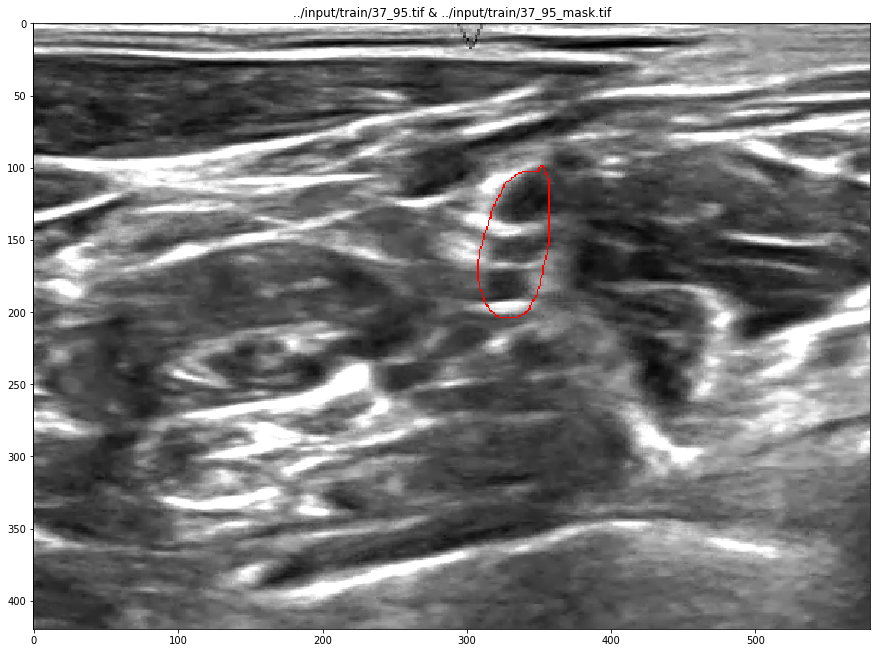

plotted: ../input/train/37_95.tif & ../input/train/37_95_mask.tif


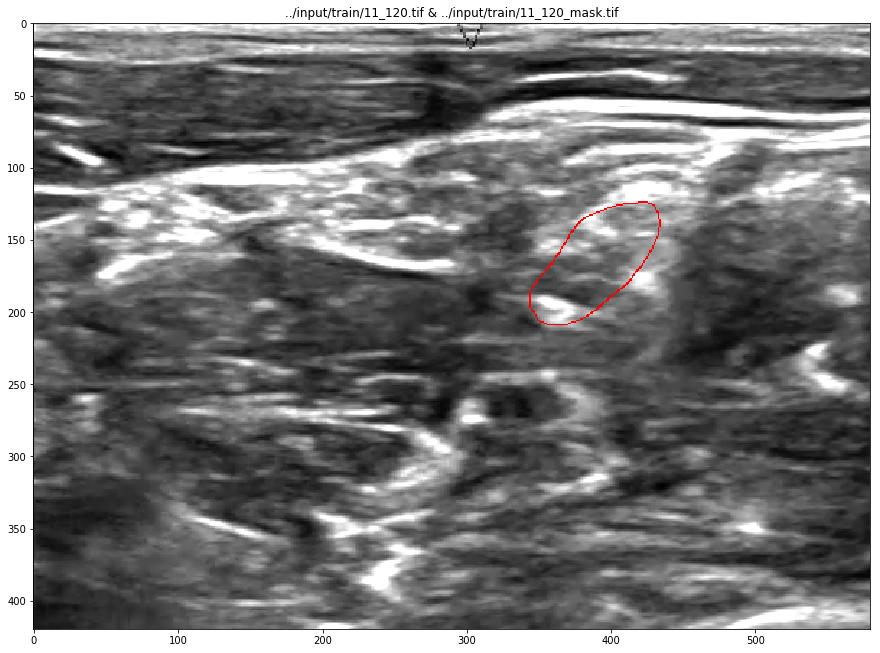

plotted: ../input/train/11_120.tif & ../input/train/11_120_mask.tif


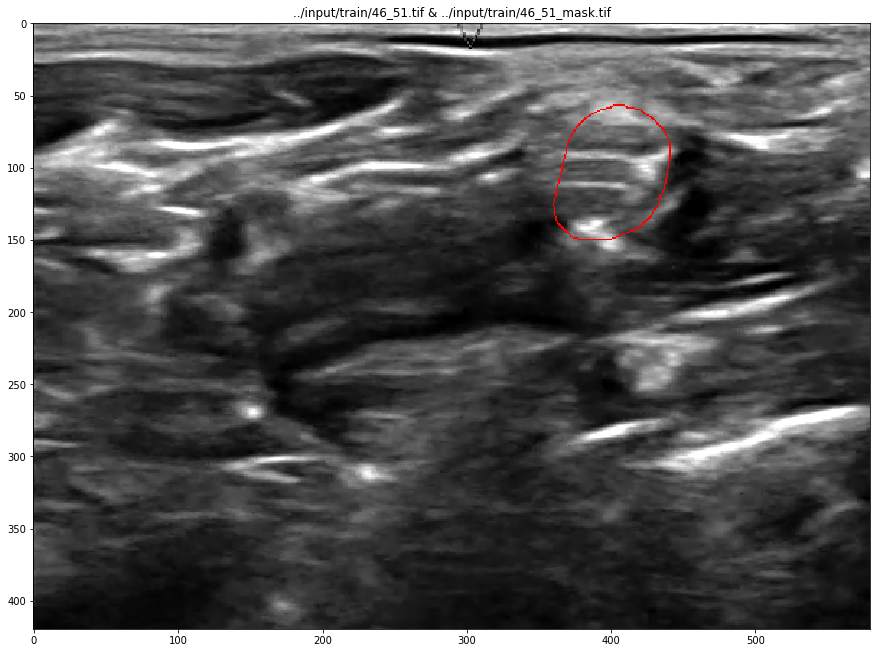

plotted: ../input/train/46_51.tif & ../input/train/46_51_mask.tif


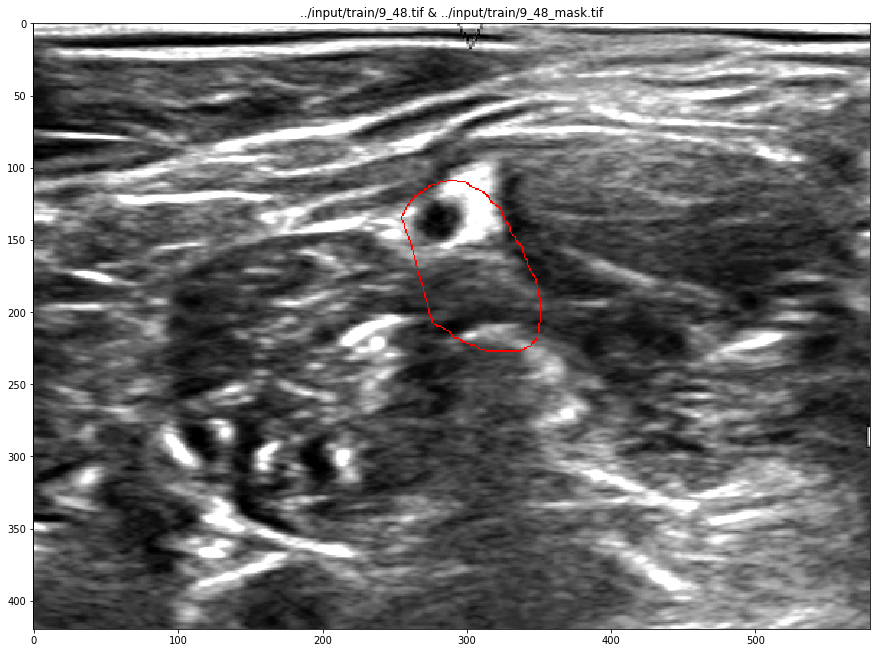

plotted: ../input/train/9_48.tif & ../input/train/9_48_mask.tif


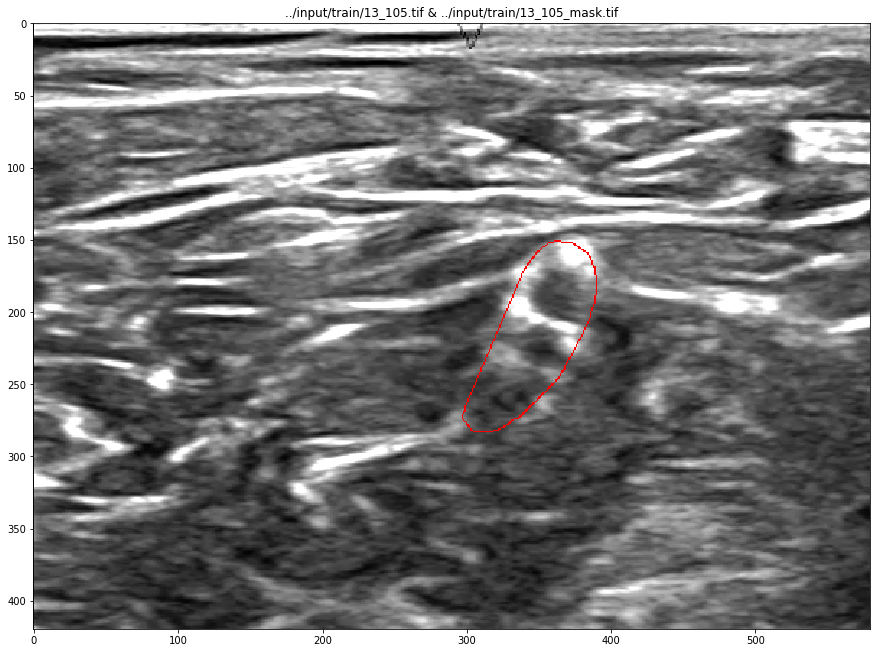

plotted: ../input/train/13_105.tif & ../input/train/13_105_mask.tif


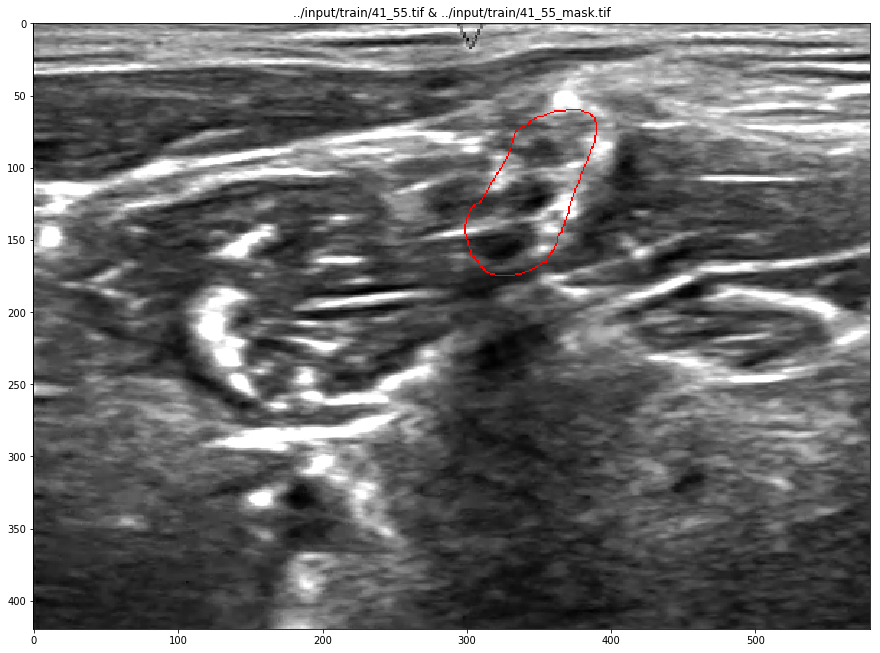

plotted: ../input/train/41_55.tif & ../input/train/41_55_mask.tif


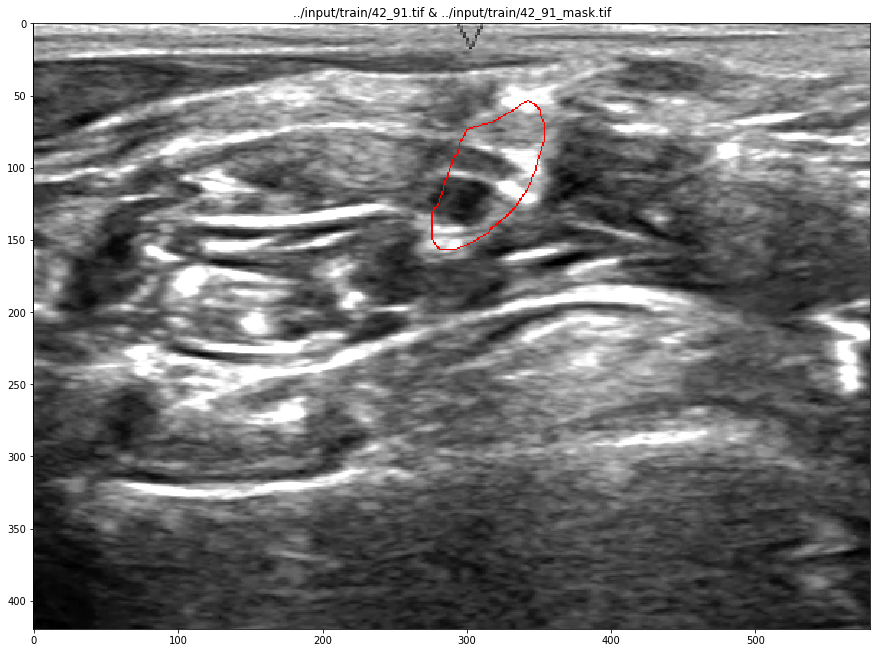

plotted: ../input/train/42_91.tif & ../input/train/42_91_mask.tif


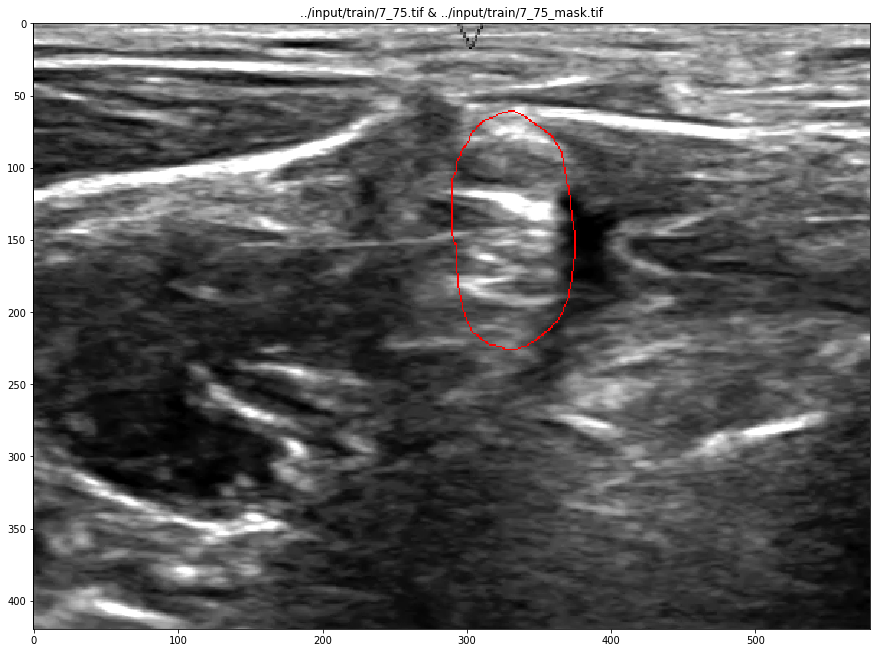

plotted: ../input/train/7_75.tif & ../input/train/7_75_mask.tif


In [1]:

# This script loops through ultrasound images in the training set that have non-blank masks,
# and then plots each image, adding the edges of their respective masks in red.
# This should outline the BP nerves in the training images. 
# Accelathon, 2019

IMAGES_TO_SHOW = 20  # configure to taste :)


import numpy as np
import matplotlib.pyplot as plt
import glob, os, os.path
import cv2


def image_with_mask(img, mask):
    # returns a copy of the image with edges of the mask added in red
    img_color = grays_to_RGB(img)
    mask_edges = cv2.Canny(mask, 100, 200) > 0  
    img_color[mask_edges, 0] = 255  # set channel 0 to bright red, green & blue channels to 0
    img_color[mask_edges, 1] = 0
    img_color[mask_edges, 2] = 0
    return img_color

def fimg_to_fmask(img_path):
    # convert an image file path into a corresponding mask file path 
    dirname, basename = os.path.split(img_path)
    maskname = basename.replace(".tif", "_mask.tif")
    return os.path.join(dirname, maskname)

def mask_not_blank(mask):
    return sum(mask.flatten()) > 0

def grays_to_RGB(img):
    # turn 2D grayscale image into grayscale RGB
    return np.dstack((img, img, img)) 

def plot_image(img, title=None):
    plt.figure(figsize=(15,20))
    plt.title(title)
    plt.imshow(img)
    plt.show()

def main():

    f_ultrasounds = [img for img in glob.glob("../input/train/*.tif") if 'mask' not in img]
    # f_ultrasounds.sort()  
    f_masks       = [fimg_to_fmask(fimg) for fimg in f_ultrasounds]
    
    images_shown = 0 

    for f_ultrasound, f_mask in zip(f_ultrasounds, f_masks):

        img  = plt.imread(f_ultrasound)
        mask = plt.imread(f_mask)

        if mask_not_blank(mask):

            # plot_image(grays_to_RGB(img),  title=f_ultrasound)
            # plot_image(grays_to_RGB(mask), title=f_mask)

            f_combined = f_ultrasound + " & " + f_mask 
            plot_image(image_with_mask(img, mask), title=f_combined)
            print('plotted:', f_combined)
            images_shown += 1

        if images_shown >= IMAGES_TO_SHOW:
            break

main()
